# Gesture Based Tool for Sterile Browsing of Radiology Images


In this project we have used Convolutional Neural Network to first train the model on the images of different hand gestures, like showing numbers with fingers as 0,1,2,3,4,5. Then we made a web portal using Flask where user can input any image on which he wants to perform the operations. After uploading the image, our portal uses the integrated webcam to capture the video frame using OpenCV. The gesture captured in the video frame is compared with the Pre-trained model and the gesture is identified. If the prediction is 0 - then images is converted into rectangle, 1 - image is Resized into (200,200), 2 - image is rotated by -45॰, 3 - image is blurred , 4 - image is Resized into (400,400) , 5 - image is converted into grayscale.

## Model Testing

## Import Libraries

In [ ]:
# This library helps add support for large, multi-dimensional arrays and matrices
import numpy as np
#open source used for both ML and DL for computation
import tensorflow as tf
#it is a plain stack of layers
from tensorflow.keras.models import Sequential 
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten, Dropout
#Faltten-used fot flattening the input or change the dimension, MaxPooling2D-for downsampling the image for Convolutional layer
from tensorflow.keras.layers import Convolution2D,MaxPooling2D 
#Its used for different augmentation of the image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Augmentation the Data

In [ ]:
#setting parameter for Image Data agumentation to the traing data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/test/
   creating: Dataset/test/0/
  inflating: Dataset/test/0/0.jpg    
  inflating: Dataset/test/0/1.jpg    
  inflating: Dataset/test/0/2.jpg    
  inflating: Dataset/test/0/3.jpg    
  inflating: Dataset/test/0/4.jpg    
   creating: Dataset/test/1/
  inflating: Dataset/test/1/0.jpg    
  inflating: Dataset/test/1/1.jpg    
  inflating: Dataset/test/1/2.jpg    
  inflating: Dataset/test/1/3.jpg    
  inflating: Dataset/test/1/4.jpg    
   creating: Dataset/test/2/
  inflating: Dataset/test/2/0.jpg    
  inflating: Dataset/test/2/1.jpg    
  inflating: Dataset/test/2/2.jpg    
  inflating: Dataset/test/2/3.jpg    
  inflating: Dataset/test/2/4.jpg    
   creating: Dataset/test/3/
  inflating: Dataset/test/3/0.jpg    
  inflating: Dataset/test/3/1.jpg    
  inflating: Dataset/test/3/2.jpg    
  inflating: Dataset/test/3/3.jpg    
  inflating: Dataset/test/3/4.jpg    
   creating: Dataset/test/4/
  inflating: Dataset/test/4/0.jpg    
  inflat

## Loading Our Data and Performing Data Augmentation

In [ ]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(r'/content/Dataset/train',
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='grayscale',
                                            class_mode='categorical')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(r'/content/Dataset/test',
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='grayscale',
                                          class_mode='categorical') 

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
print(x_train.class_indices)#checking the number of classes

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


## Initializing The Model

In [ ]:
# Initializing the CNN
model = Sequential()

## Adding CNN Layers

In [ ]:
# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Flattening the layers i.e. input layer
model.add(Flatten())

## Adding Dense Layers

In [ ]:
# Adding a fully connected layer, i.e. Hidden Layer
model.add(Dense(units=512 , activation='relu'))

In [ ]:
# softmax for categorical analysis, Output Layer
model.add(Dense(units=6, activation='softmax')) 

In [ ]:
model.summary()#summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

## Configure The Learning Process

In [ ]:
# Compiling the CNN
# categorical_crossentropy for more than 2
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

## Train The Model

In [ ]:
# It will generate packets of train and test data for training
model.fit_generator(x_train,
                    steps_per_epoch = 594/3 , 
                    epochs = 25, 
                    validation_data = x_test,
                    validation_steps = 30/3 )

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


198/198 [==============================] - 10s 7ms/step - loss: 1.3351 - accuracy: 0.4663 - val_loss: 0.5319 - val_accuracy: 0.7667
Epoch 2/25
198/198 [==============================] - 1s 6ms/step - loss: 0.6197 - accuracy: 0.7508 - val_loss: 0.4076 - val_accuracy: 0.8667
Epoch 3/25
198/198 [==============================] - 2s 9ms/step - loss: 0.4441 - accuracy: 0.8165 - val_loss: 0.3449 - val_accuracy: 0.8667
Epoch 4/25
198/198 [==============================] - 1s 6ms/step - loss: 0.2914 - accuracy: 0.8939 - val_loss: 0.3476 - val_accuracy: 0.8667
Epoch 5/25
198/198 [==============================] - 1s 6ms/step - loss: 0.2248 - accuracy: 0.9175 - val_loss: 0.2770 - val_accuracy: 0.9667
Epoch 6/25
198/198 [==============================] - 1s 6ms/step - loss: 0.1729 - accuracy: 0.9360 - val_loss: 0.2915 - val_accuracy: 0.9333
Epoch 7/25
198/198 [==============================] - 1s 6ms/step - loss: 0.1187 - accuracy: 0.9562 - val_loss: 0.3042 - val_accuracy: 0.9667
Epoch 8/25
198/1

## Save The Model

In [ ]:
# Save the model
model.save('gesture.h5')

In [ ]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

# Test The Model

## Importing Libraries

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5") #loading the model for testing
path = "/content/Dataset/test/3/2.jpg"

## Plotting the image

Populating the interactive namespace from numpy and matplotlib


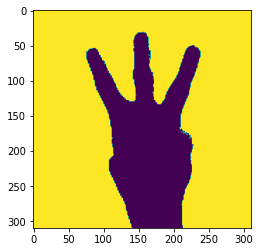

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [ ]:
#loading of the image
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
#changing the shape
x = np.expand_dims(x,axis = 0)

In [ ]:
x.shape

(1, 64, 64, 1)

## Predicting our results

In [ ]:
pred = np.argmax(model.predict(x), axis=-1)#predicting the classes



1/1 [==============================] - 0s 128ms/step


In [ ]:
index=['0','1','2','3','4','5']
result=str(index[pred[0]])
result

'3'

In [ ]:
import numpy as np
p = []

for i in range(0,6):
    for j in range(0,5):
        path = "/content/Dataset/test/"+str(i)+"//"+str(j)+".jpg"
        img = image.load_img(path,color_mode = "grayscale",target_size= (64,64))
        x = image.img_to_array(img)
        x = np.expand_dims(x,axis = 0)
        pred = np.argmax(model.predict(x), axis=-1)
        p.append(pred)

print(p)

1/1 [==============================] - 0s 14ms/step
[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([3]), array([3]), array([3]), array([3]), array([3]), array([4]), array([4]), array([4]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([5])]


In [ ]:
result = []
index=['0','1','2','3','4','5']
for i in p:
    result.append(index[i[0]])
    
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']
